In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
install.packages("e1071")
install.packages("GGally")
library(GGally)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependencies ‘progress’, ‘reshape’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



In [2]:
red_data <- read.csv("winequality-red.csv", sep = ";") 
head(red_data)
white_data <- read.csv("winequality-white.csv", sep = ";")
head(white_data)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [3]:
# See the rough distribution of quality level
red_data %>% 
    group_by(quality) %>%
    summarize(n = n()) 
#     ggplot(aes(x = quality, y = n)) +
#     geom_bar(stat = "identity", position = "dodge") 

white_data %>%
    group_by(quality) %>%
    summarize(n=n()) 
#     ggplot(aes(x = quality, y = n)) +
#     geom_bar(stat = "identity", position = "dodge") 

quality,n
3,10
4,53
5,681
6,638
7,199
8,18


quality,n
3,20
4,163
5,1457
6,2198
7,880
8,175
9,5


In [4]:
#See the relationship between quality and chlorides, free.sulfur.dioxide,total.sulfur.dioxide and SO_ratio
options(repr.plot.width = 7, repr.plot.height = 6)

red_var <- red_data %>%
    mutate(SO_ratio = free.sulfur.dioxide/total.sulfur.dioxide) %>%
    select(chlorides:total.sulfur.dioxide, SO_ratio,quality) 
red_var$quality <- as.factor(red_var$quality)

white_var <- white_data %>%
    mutate(SO_ratio = free.sulfur.dioxide/total.sulfur.dioxide) %>%
    select(chlorides:total.sulfur.dioxide, SO_ratio,quality) 
white_var$quality <- as.factor(white_var$quality)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


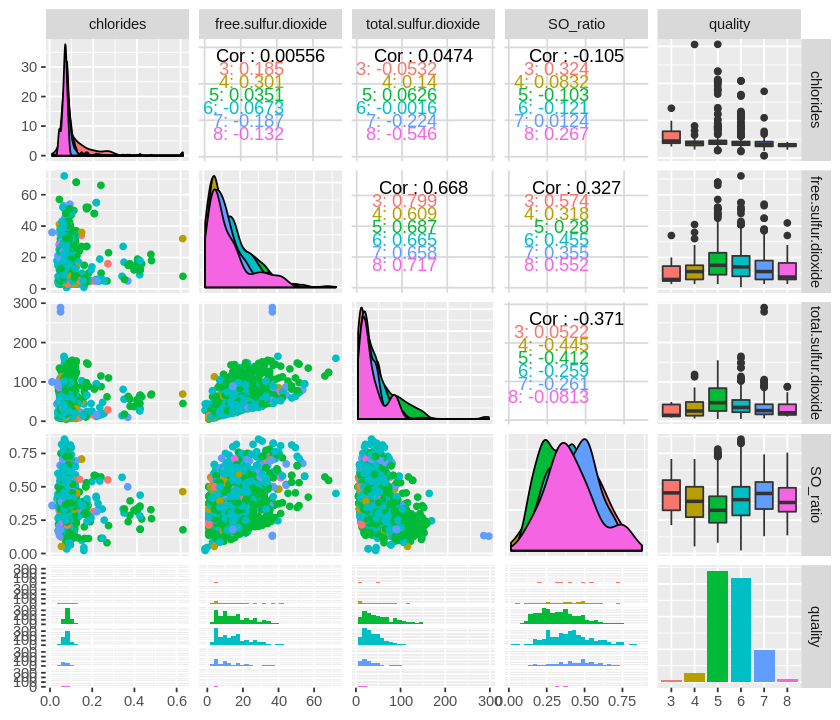

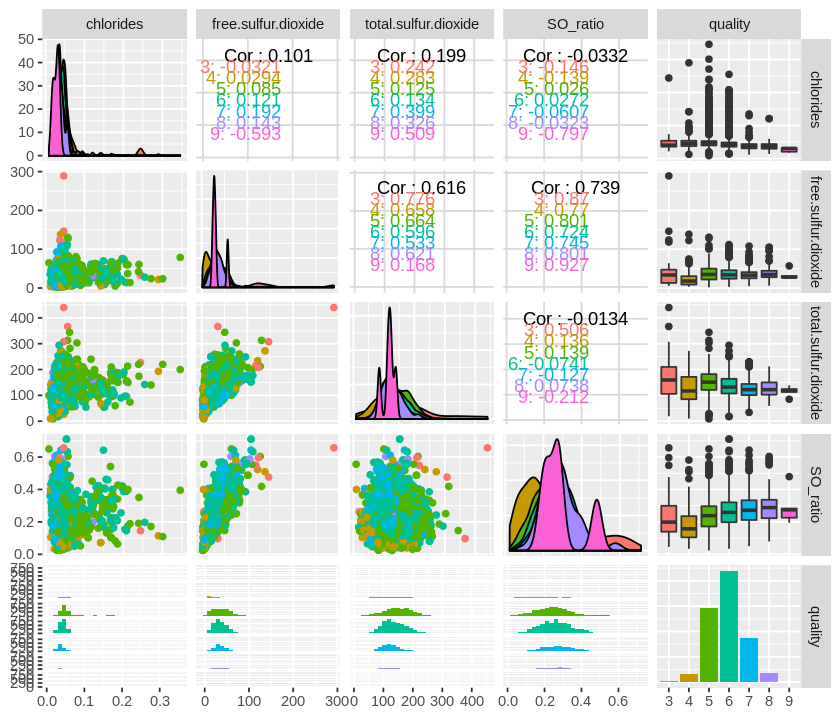

In [5]:
ggpairs(red_var, mapping = ggplot2::aes(colour = quality))
ggpairs(white_var, mapping = ggplot2::aes(colour = quality))

In [6]:
# Scaled the variables
red_scaled_var <- red_var %>%
    mutate(scaled_chlorides = as.vector(scale(chlorides, center = FALSE)),scaled_free.sulfur.dioxide = as.vector(scale(free.sulfur.dioxide, center = FALSE)),scaled_total.sulfur.dioxide = as.vector(scale(total.sulfur.dioxide	, center = FALSE)), scaled_SO_ratio = as.vector(scale(SO_ratio, center = FALSE)))%>%
    select(scaled_chlorides:scaled_SO_ratio,quality) 
red_scaled_var$scaled_chlorides <- as.vector( red_scaled_var$scaled_chlorides )

glimpse(red_scaled_var)
white_scaled_var <- white_var %>%
    mutate(scaled_chlorides = scale(chlorides, center = FALSE),scaled_free.sulfur.dioxide = scale(free.sulfur.dioxide, center = FALSE),scaled_total.sulfur.dioxide = scale(total.sulfur.dioxide	, center = FALSE), scaled_SO_ratio = as.vector(scale(SO_ratio, center = FALSE))) %>%
    select(scaled_chlorides:scaled_SO_ratio, quality) 
glimpse(white_scaled_var)


Observations: 1,599
Variables: 5
$ scaled_chlorides            <dbl> 0.7649761, 0.9864165, 0.9260236, 0.7549...
$ scaled_free.sulfur.dioxide  <dbl> 0.5784783, 1.3147233, 0.7888340, 0.8940...
$ scaled_total.sulfur.dioxide <dbl> 0.5970695, 1.1765782, 0.9482869, 1.0536...
$ scaled_SO_ratio             <dbl> 0.7841759, 0.9044091, 0.6732824, 0.6867...
$ quality                     <fct> 5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, ...
Observations: 4,898
Variables: 5
$ scaled_chlorides            <dbl> 0.8871633, 0.9660223, 0.9857370, 1.1434...
$ scaled_free.sulfur.dioxide  <dbl> 1.1481392, 0.3571989, 0.7654261, 1.1991...
$ scaled_total.sulfur.dioxide <dbl> 1.1744078, 0.9118931, 0.6701032, 1.2849...
$ scaled_SO_ratio             <dbl> 0.9719698, 0.3894425, 1.1356348, 0.9278...
$ quality                     <fct> 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, ...


In [25]:
#knn regression for red wine
training_rows <- red_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 unlist() %>%
 createDataPartition(p = 0.75, list = FALSE)

head(training_rows)
X_train <- red_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 slice(training_rows) %>% 
 data.frame()

Y_train <- red_data %>% 
 select(quality) %>% 
 slice(training_rows) %>% 
 unlist()

X_test <- red_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 slice(-training_rows) %>% 
 data.frame()

Y_test <- red_data %>% 
 select(quality) %>% 
 slice(-training_rows) %>% 
 unlist()

Resample1
1
2
3
4
5
6


In [ ]:
set.seed(1000)

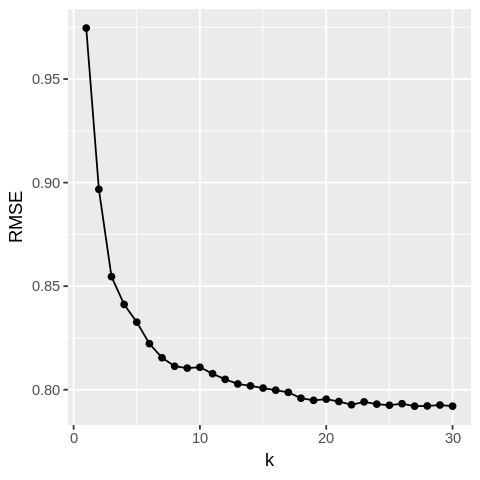

In [22]:
train_control <- trainControl(method = "cv", number = 3)
k_lots = data.frame(k = seq(from = 1, to = 30)) 
knn_cv <- train(x = X_train, 
                       y = Y_train, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 

options(repr.plot.width = 4, repr.plot.height = 4) 
choosing_k <- ggplot(knn_cv$results, aes(x = k, y = RMSE)) +
  geom_point() +
  geom_line()
choosing_k

In [24]:
#knn regression for white wine
training_rows <- white_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 unlist() %>%
 createDataPartition(p = 0.75, list = FALSE)

head(training_rows)
X_train2 <- white_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 slice(training_rows) %>% 
 data.frame()

Y_train2 <- white_data %>% 
 select(quality) %>% 
 slice(training_rows) %>% 
 unlist()

X_test2 <- white_data %>% 
 select(free.sulfur.dioxide,total.sulfur.dioxide) %>% 
 slice(-training_rows) %>% 
 data.frame()

Y_test2 <- white_data %>% 
 select(quality) %>% 
 slice(-training_rows) %>% 
 unlist()

Resample1
1
3
5
6
7
10


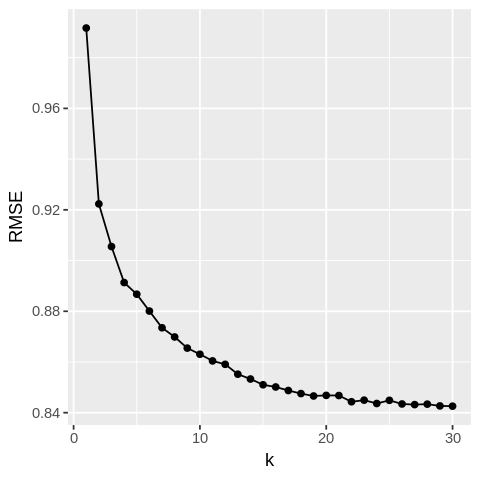

In [26]:
train_control <- trainControl(method = "cv", number = 3)
k_lots = data.frame(k = seq(from = 1, to = 30)) 
knn_cv <- train(x = X_train2, 
                       y = Y_train2, 
                       method = "knn", 
                       tuneGrid = k_lots, 
                       trControl = train_control) 

options(repr.plot.width = 4, repr.plot.height = 4) 
choosing_k <- ggplot(knn_cv$results, aes(x = k, y = RMSE)) +
  geom_point() +
  geom_line()
choosing_k